In [1]:
!pip install dash

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import html, dcc, Input, Output
import threading
from google.colab import output

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_covid = pd.read_csv('/content/drive/MyDrive/zaverecny_projekt/project_1_python.csv')
display(df_covid.head())

,index,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,hosp_patients,...,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,median_age,gdp_per_capita,life_expectancy,latitude,longitude
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,39835428.0,18.6,1803.987,64.83,33.0,65.0


In [5]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180477 entries, 0 to 180476
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    180477 non-null  int64  
 1   iso_code                 180477 non-null  object 
 2   continent                180477 non-null  object 
 3   location                 180477 non-null  object 
 4   date                     180477 non-null  object 
 5   total_cases              173493 non-null  float64
 6   new_cases                173212 non-null  float64
 7   total_deaths             155323 non-null  float64
 8   new_deaths               155095 non-null  float64
 9   hosp_patients            27152 non-null   float64
 10  total_tests              78326 non-null   float64
 11  new_tests                74509 non-null   float64
 12  tests_per_case           92600 non-null   float64
 13  total_vaccinations       46366 non-null   float64
 14  peop

In [6]:
missing_data = pd.DataFrame({
    'Total values': len(df_covid),
    'Missing values': df_covid.isnull().sum(),
})
missing_data['Missing (%)'] = (missing_data['Missing values'] / missing_data['Total values']) * 100

display(missing_data)

,Total values,Missing values,Missing (%)
index,180477,0,0.000000
iso_code,180477,0,0.000000
continent,180477,0,0.000000
location,180477,0,0.000000
date,180477,0,0.000000
total_cases,180477,6984,3.869745
new_cases,180477,7265,4.025444
total_deaths,180477,25154,13.937510
new_deaths,180477,25382,14.063842
hosp_patients,180477,153325,84.955424


In [7]:
df_pop = df_covid[['location', 'population']].drop_duplicates()
df_pop.head()

,location,population
0,Afghanistan,39835428.0
846,Albania,2872934.0
1691,Algeria,44616626.0
2536,Andorra,77354.0
3375,Angola,33933611.0


In [8]:
df_top10_pop = df_pop.sort_values(by='population', ascending=False).head(10)
df_top10_pop

,location,population
33499,China,1.444216e+09
74570,India,1.393409e+09
170959,United States,3.329151e+08
75441,Indonesia,2.763618e+08
122998,Pakistan,2.251999e+08
21805,Brazil,2.139934e+08
118134,Nigeria,2.114007e+08
12663,Bangladesh,1.663035e+08
133450,Russia,1.459120e+08
103850,Mexico,1.302622e+08


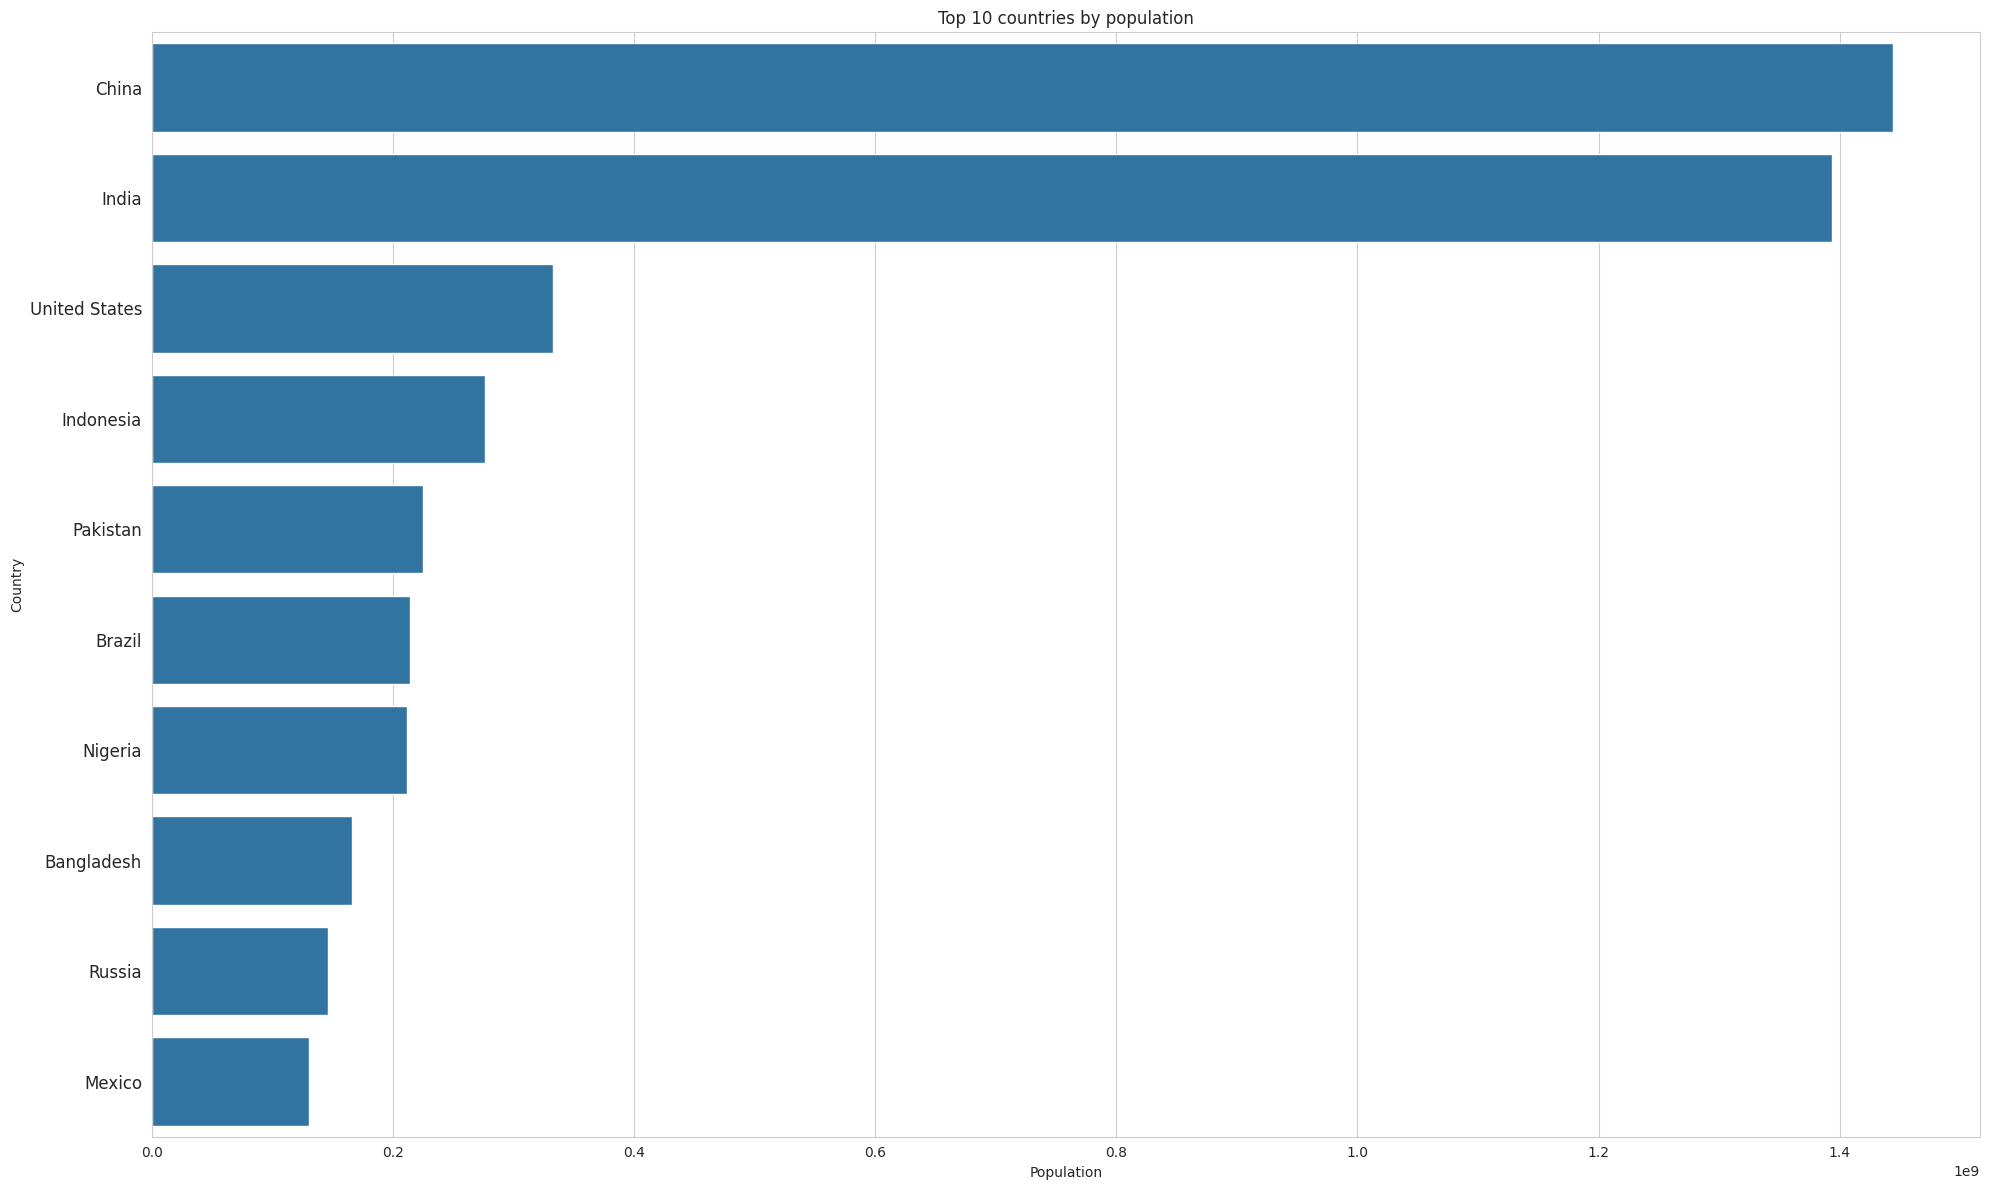

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(20, 12))
ax = sns.barplot(data=df_top10_pop, x='population', y='location')
plt.yticks(fontsize=12)
plt.title('Top 10 countries by population')
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [10]:
df_population_lifeexp = df_covid[['location', 'continent', 'population', 'life_expectancy']].drop_duplicates()
df_population_lifeexp = df_population_lifeexp.dropna(subset=['population', 'life_expectancy'])
df_population_lifeexp.shape

(223, 4)

In [11]:
fig = px.scatter(
    df_population_lifeexp,
    x='population',
    y='life_expectancy',
    color='continent',
    hover_name='location',
    size='population',
    size_max=40,
    title='Relationship Between Population Size and Life Expectancy',
    color_discrete_sequence=px.colors.qualitative.Dark24
)

fig.update_xaxes(title='Population (log scale)', type='log')

fig.update_yaxes(title='Life Expectancy (years)')

fig.show()

In [12]:
df_cases_two = df_covid[df_covid['location'].isin(['China', 'Czechia'])].copy()
df_cases_two['date'] = pd.to_datetime(df_cases_two['date'])

country_colors = {
    'China': '#c00000',
    'Czechia': '#005BBB'
}


fig = px.line(
    df_cases_two,
    x='date',
    y='new_cases',
    color='location',
    color_discrete_map=country_colors,
    markers=True,
    title='New COVID-19 Cases Over Time: China vs Czechia',
    labels={
        'date': 'Date',
        'new_cases': 'New COVID-19 cases per day',
        'location': 'Country'
    }
)

fig.update_yaxes(rangemode='tozero')
fig.show()

In [13]:
df_world = df_covid.dropna(subset=['iso_code', 'total_cases', 'continent'])

df_world_total = (
    df_world
    .groupby(['iso_code', 'location', 'continent'], as_index=False)['total_cases']
    .max()
)

df_world_total.head()


,iso_code,location,continent,total_cases
0,ABW,Aruba,North America,39980.0
1,AFG,Afghanistan,Asia,181574.0
2,AGO,Angola,Africa,99761.0
3,AIA,Anguilla,North America,3374.0
4,ALB,Albania,Europe,277141.0


In [14]:
df_map = df_covid.dropna(
    subset=['iso_code', 'location', 'continent', 'population', 'total_cases', 'latitude', 'longitude']
).copy()

df_world_map = (
    df_map
    .groupby(['iso_code', 'location', 'continent', 'population', 'latitude', 'longitude'], as_index=False)['total_cases']
    .max()
)

df_world_map['cases_per_100k'] = df_world_map['total_cases'] / df_world_map['population'] * 100_000

df_world_map.head()


,iso_code,location,continent,population,latitude,longitude,total_cases,cases_per_100k
0,ABW,Aruba,North America,107195.0,12.50,-69.9667,39980.0,37296.515696
1,AFG,Afghanistan,Asia,39835428.0,33.00,65.0000,181574.0,455.810340
2,AGO,Angola,Africa,33933611.0,-12.50,18.5000,99761.0,293.988754
3,AIA,Anguilla,North America,15125.0,18.25,-63.1667,3374.0,22307.438017
4,ALB,Albania,Europe,2872934.0,41.00,20.0000,277141.0,9646.619101


In [15]:
fig = px.scatter_mapbox(
    df_world_map,
    lat='latitude',
    lon='longitude',
    color='continent',
    size='cases_per_100k',
    hover_name='location',
    hover_data={
        'total_cases': True,
        'cases_per_100k': ':.1f',
        'continent': True,
        'latitude': False,
        'longitude': False
    },
    size_max=40,
    zoom=1,
    center={'lat': 0, 'lon': 0},
    title='Global COVID-19 burden: total cases and cases per 100k population'
)

fig.update_layout(
    mapbox_style='open-street-map',
    margin={'r': 0, 't': 60, 'l': 0, 'b': 0}
)

fig.show()


In [16]:
countries = sorted(df_covid['location'].dropna().unique())

default_country = 'Czechia' if 'Czechia' in countries else countries[0]

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1(id='page-title', style={'textAlign': 'center', 'marginBottom': '30px'}),
    html.Div([
        html.Label('Select country:', style={'marginRight': '10px', 'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': c, 'value': c} for c in countries],
            value=default_country,
            clearable=False,
            style={'width': '300px'}
        ),
    ], style={'marginBottom': '30px'}),

    html.Div([
        html.Div([
            dcc.Graph(id='cases-chart')
        ], style={'flex': '1', 'padding': '10px'}),

        html.Div([
            dcc.Graph(id='deaths-chart')
        ], style={'flex': '1', 'padding': '10px'}),
    ], style={'display': 'flex', 'flexDirection': 'row'})
])

@app.callback(
    [Output('page-title', 'children'),
     Output('cases-chart', 'figure'),
     Output('deaths-chart', 'figure')],
    [Input('country-dropdown', 'value')]
)
def update_charts(selected_country):
    dff = df_covid[df_covid['location'] == selected_country].copy()
    dff = dff.sort_values('date')
    title_text = f'Cumulative COVID-19 cases in {selected_country}'
    fig_cases = px.line(
        dff,
        x='date',
        y='total_cases',
        title=f'Cumulative number of cases in {selected_country}'
    )
    fig_cases.update_layout(
        xaxis_title='Date',
        yaxis_title='Number of cases'
    )

    fig_deaths = px.line(
        dff,
        x='date',
        y='total_deaths',
        title=f'Cumulative number of deaths in {selected_country}'
    )
    fig_deaths.update_layout(
        xaxis_title='Date',
        yaxis_title='Number od deaths'
    )

    return title_text, fig_cases, fig_deaths

port = 8050

def run_dash():
    app.run(host='0.0.0.0', port=port, debug=False, use_reloader=False)

thread = threading.Thread(target=run_dash, daemon=True)
thread.start()

output.serve_kernel_port_as_iframe(port, path='/')

Dash is running on http://0.0.0.0:8050/



INFO:dash.dash:Dash is running on http://0.0.0.0:8050/



<IPython.core.display.Javascript object>

In [17]:
dates = pd.to_datetime(df_covid['date'])
last_date = dates.max()

df_last_day = df_covid[dates == last_date].copy()

continents = sorted(df_last_day['continent'].dropna().unique())

metric_options = {
    "Total number of positive cases": "total_cases",
    "Total number of deaths": "total_deaths",
    "Total number of tests": "total_tests",
    "Total number of vaccinations": "total_vaccinations",
    "Total number of vaccinated people": "people_vaccinated"
}

default_continent = 'Europe' if 'Europe' in continents else continents[0]
default_metric_label = "Total number of positive cases"

app_map = dash.Dash(__name__)

app_map.layout = html.Div([

    html.H1(
        id='map-title',
        style={'textAlign': 'center', 'marginBottom': '30px'}
    ),

    html.Div([
        html.Div([
            html.Label(
                'Select continent:',
                style={'marginRight': '10px', 'fontWeight': 'bold'}
            ),
            dcc.Dropdown(
                id='continent-dropdown',
                options=[{'label': c, 'value': c} for c in continents],
                value=default_continent,
                clearable=False,
                style={'width': '300px'}
            )
        ], style={'marginRight': '30px'}),

        html.Div([
            html.Label(
                'Select metric:',
                style={'marginRight': '10px', 'fontWeight': 'bold'}
            ),
            dcc.Dropdown(
                id='metric-dropdown',
                options=[{'label': label, 'value': label} for label in metric_options.keys()],
                value=default_metric_label,
                clearable=False,
                style={'width': '400px'}
            )
        ])
    ], style={'display': 'flex', 'flexDirection': 'row', 'marginBottom': '20px'}),

    dcc.Graph(id='covid-map')
])

#Callback

@app_map.callback(
    [Output('map-title', 'children'),
     Output('covid-map', 'figure')],
    [Input('continent-dropdown', 'value'),
     Input('metric-dropdown', 'value')]
)
def update_map(selected_continent, selected_metric_label):
    metric_column = metric_options[selected_metric_label]

    dff = df_last_day[df_last_day['continent'] == selected_continent].copy()

    dff = dff.dropna(subset=[metric_column])

    if dff.empty:
        empty_fig = px.scatter_mapbox(
            pd.DataFrame({'latitude': [], 'longitude': [], metric_column: [], 'location': []}),
            lat='latitude',
            lon='longitude',
            size=metric_column,
            hover_name='location',
            size_max=40,
            zoom=1
        )
        empty_fig.update_layout(
            mapbox_style='carto-darkmatter',
            margin={'r': 0, 't': 0, 'l': 0, 'b': 0}
        )
        title_text = f"COVID-19 - {selected_metric_label} in {selected_continent} (no data)"
        return title_text, empty_fig

    fig = px.scatter_mapbox(
        dff,
        lat='latitude',
        lon='longitude',
        size=metric_column,
        hover_name='location',
        hover_data={
            metric_column: True,
            'latitude': True,
            'longitude': True
        },
        size_max=40,
        zoom=1
    )

    fig.update_layout(
        mapbox_style='carto-darkmatter',
        margin={'r': 0, 't': 0, 'l': 0, 'b': 0}
    )

    return f"COVID-19 - {selected_metric_label} in {selected_continent}", fig

port = 8060

def run_dash_app():
    app_map.run(
        host='0.0.0.0',
        port=port,
        debug=False,
        use_reloader=False
    )

thread = threading.Thread(target=run_dash_app, daemon=True)
thread.start()

output.serve_kernel_port_as_window(port, path='/')

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://172.28.0.12:8050
INFO:werkzeug:Press CTRL+C to quit


Dash is running on http://0.0.0.0:8060/

Try `serve_kernel_port_as_iframe` instead. 


INFO:dash.dash:Dash is running on http://0.0.0.0:8060/



<IPython.core.display.Javascript object>

 * Serving Flask app '__main__'
 * Debug mode: off


In [20]:
dates = pd.to_datetime(df_covid['date'])
last_date = dates.max()

df_last_day = df_covid[dates == last_date].copy()

df_last_vacc = df_last_day.dropna(subset=['total_vaccinations', 'population'])

df_last_vacc = df_last_vacc[df_last_vacc['population'] > 0]

app_vacc = dash.Dash(__name__)

n_values = [5, 10, 15, 20]
default_n = 5

app_vacc.layout = html.Div([
    html.H1(
        "COVID-19 - Vaccinations overview (Top N countries)",
        style={'textAlign': 'center', 'marginBottom': '30px'}
    ),

    html.Div([
        html.Label(
            "Select number of countries to display:",
            style={'fontWeight': 'bold', 'marginBottom': '10px', 'display': 'block'}
        ),
        dcc.Slider(
            id='n-countries-slider',
            min=min(n_values),
            max=max(n_values),
            step=5,
            value=default_n,
            marks={n: str(n) for n in n_values},
            tooltip={"placement": "bottom", "always_visible": True}
        )
    ], style={'marginBottom': '40px'}),

    html.Div([
        html.Div([
            dcc.Graph(id='top-total-vacc-graph')
        ], style={'width': '50%', 'padding': '10px'}),

        html.Div([
            dcc.Graph(id='top-ratio-vacc-graph')
        ], style={'width': '50%', 'padding': '10px'})
    ], style={'display': 'flex', 'flexDirection': 'row'})
])

@app_vacc.callback(
    [Output('top-total-vacc-graph', 'figure'),
     Output('top-ratio-vacc-graph', 'figure')],
    [Input('n-countries-slider', 'value')]
)
def update_vaccination_charts(n):

    dff_total = df_last_vacc.sort_values(
        'total_vaccinations',
        ascending=False
    ).head(n)

    fig_total = px.bar(
        dff_total,
        x='location',
        y='total_vaccinations',
        title=f"Top {n} countries by total vaccinations (absolute)",
        labels={'location': 'Country', 'total_vaccinations': 'Total vaccinations'}
    )
    fig_total.update_layout(xaxis_tickangle=-45, margin={'l': 40, 'r': 20, 't': 60, 'b': 100})

    dff_ratio = df_last_vacc.copy()
    dff_ratio['vacc_per_person'] = dff_ratio['total_vaccinations'] / dff_ratio['population']
    dff_ratio = dff_ratio.sort_values(
        'vacc_per_person',
        ascending=False
    ).head(n)

    fig_ratio = px.bar(
        dff_ratio,
        x='location',
        y='vacc_per_person',
        title=f"Top {n} countries by total vaccinations per capita",
        labels={'location': 'Country', 'vacc_per_person': 'Vaccinations per person'}
    )
    fig_ratio.update_layout(xaxis_tickangle=-45, margin={'l': 40, 'r': 20, 't': 60, 'b': 100})

    return fig_total, fig_ratio

port_vacc = 8061

def run_vacc_app():
    app_vacc.run(
        host='0.0.0.0',
        port=port_vacc,
        debug=False,
        use_reloader=False
    )

thread_vacc = threading.Thread(target=run_vacc_app, daemon=True)
thread_vacc.start()

output.serve_kernel_port_as_iframe(port_vacc, path='/')

Dash is running on http://0.0.0.0:8061/



<IPython.core.display.Javascript object>

INFO:dash.dash:Dash is running on http://0.0.0.0:8061/



 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 8061 is in use by another program. Either identify and stop that program, or start the server with a different port.
